# Random Variable Distributions

There are many styles of randomness in nature and in theory.  Sometimes the randomness can be described as having a distribution, or probability density function, that is a named function.  The most common and famous one is the Gaussian, or Normal distribution.  The uniform distribution is the simplest possible distribution.

## Plotting a distribution: quick look

First, let's get our notebook session set up with a directive and some standard imports.

In [1]:
%matplotlib notebook

# Our standard imports:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Access to many standard distributions:
import scipy.stats as ss

# Uncomment for low-res display:
#plt.rcParams['figure.dpi'] = 80

There are two basic ways of visualizing distributions: as probability density functions (PDF) and as cumulative density functions (CDF).  The CDF is just the integral of the PDF; and because the PDF is the derivative of the CDF, it looks noisier when estimated from a sample of modest size.

We will start with two standard distributions: normal (Gaussian), and uniform.  

We will also start by plotting using the canned black-box `hist()` function.  Then we will back up and break the operation into its component parts to be sure we understand what is going on.

The `hist()` function or Axes method has many options and capabilities--probably too many.  We will use only a few of them. To begin, let's plot counts per bin. We will let the function select the bin boundaries.

<IPython.core.display.Javascript object>


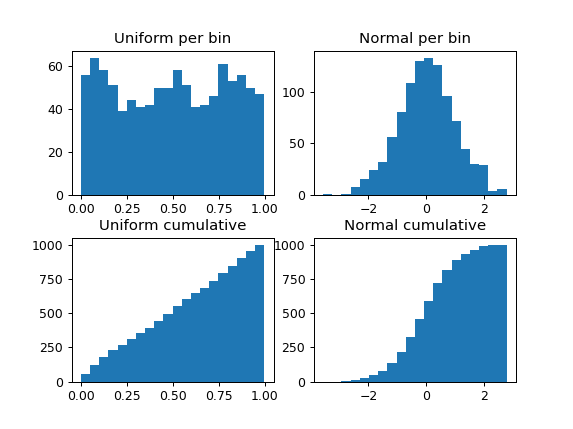

In [2]:
nsamp = 1000
nbins = nsamp // 50

np.random.seed(1234)

yg = np.random.randn(nsamp)
yu = np.random.rand(nsamp)

fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.3)

ax = axs[0, 0]
ax.hist(yu, bins=nbins)
ax.set_title('Uniform per bin')

ax = axs[1, 0]
ax.hist(yu, bins=nbins, cumulative=True)
ax.set_title('Uniform cumulative')

ax = axs[0, 1]
ax.hist(yg, bins=nbins)
ax.set_title('Normal per bin')

ax = axs[1, 1]
ax.hist(yg, bins=nbins, cumulative=True)
ax.set_title('Normal cumulative');

In [5]:
plt.close(fig)

Next, we will use a normalization that provides an approximate PDF and CDF.

<IPython.core.display.Javascript object>


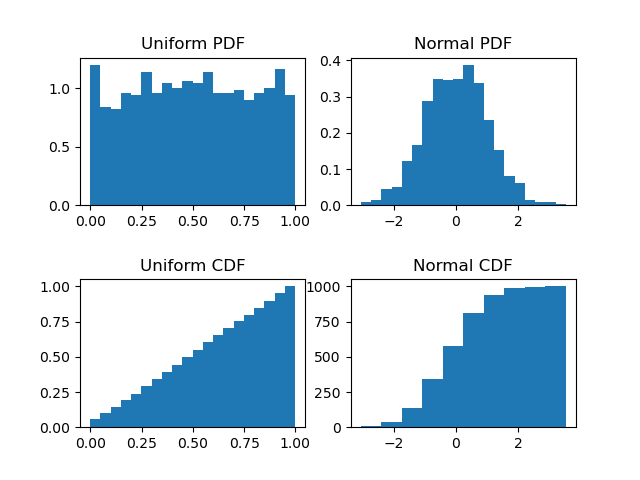

Text(0.5, 1.0, 'Normal CDF')

In [16]:
nsamp = 1000
nbins = nsamp // 50

# keyword arguments for all subplots
kwargs = dict(bins=nbins, density=True)

yg = np.random.randn(nsamp)
yu = np.random.rand(nsamp)

fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5)

ax = axs[0, 0]
ax.hist(yu, **kwargs)
ax.set_title('Uniform PDF')

ax = axs[1, 0]
ax.hist(yu, cumulative=True, **kwargs)
ax.set_title('Uniform CDF')

ax = axs[0, 1]
ax.hist(yg, **kwargs)
ax.set_title('Normal PDF')

ax = axs[1, 1]
ax.hist(yg, cumulative=True, **kwargs)
ax.set_title('Normal CDF')

In [15]:
plt.close(fig)

As you see, the integral of the PDF over all possible values is 1, so the CDF goes from 0 to 1. The CDF really should be plotted as a line from point to point and starting at (0, 0), not with steps, but unfortunately Matplotlib's `hist` function lacks an option for this.  Below, we will see how to get around this design error.  But first, let's verify a basic principle in statistics.

## Central Limit Theorem

Why is the Normal distribution so central to statistics?  There's a theorem about that!

If you take the average of more and more realizations of any distribution, the distribution of those averages approaches a Gaussian distribution.  Let's illustrate this first with the uniform distribution.

<IPython.core.display.Javascript object>


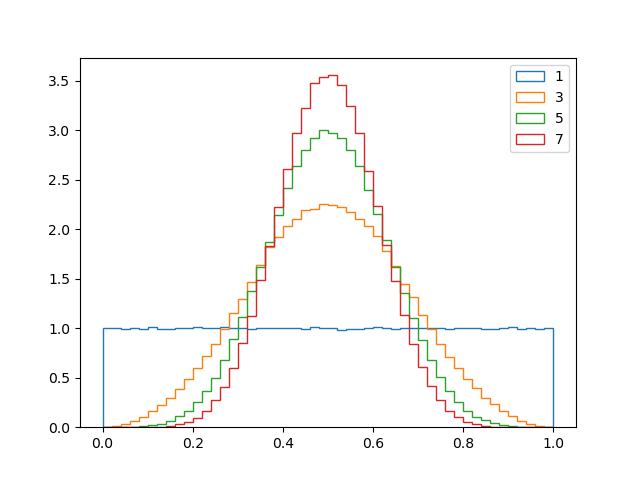

In [32]:
npts = 1000000
navgs = [1, 3, 5, 7]

# help(np.random.rand)
bins=np.linspace(0, 1, num=51)
fig, ax = plt.subplots()
for navg in navgs:
    y = np.random.rand(npts, navg).mean(axis=-1)
    ax.hist(y, histtype='step', bins=bins, density=True, label=str(navg))
ax.legend(loc='upper right')    

In [22]:
plt.close(fig)

What happens if we square the values of a uniform distribution?

<IPython.core.display.Javascript object>


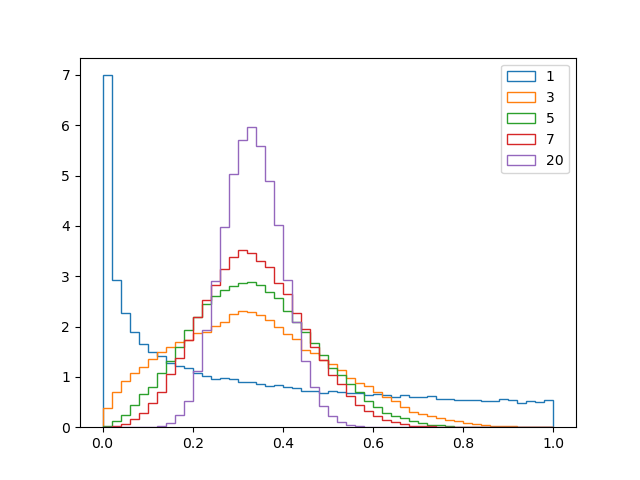

In [23]:
npts = 100000
navgs = [1, 3, 5, 7, 20]

bins=np.linspace(0, 1, num=51)
fig, ax = plt.subplots()
for navg in navgs:
    y = (np.random.rand(npts, navg)**2).mean(axis=-1)
    ax.hist(y, histtype='step', bins=bins, density=True, label=str(navg))
ax.legend(loc='upper right')    

In [ ]:
plt.close(fig)

Notice how skewed the original distribution is.  As a result, more averaging is required to approach the Gaussian than was the case when we started with a uniform distribution. 

## Plotting a distribution: calculate, then plot

The `hist()` function in matplotlib is using `np.histogram` to do the calculation, so let's look at that underlying function.  Notice that it shares some argument names with `hist`.  Let's experiment with the `bins` argument and the `density` argument, using a uniform distribution. 

In [29]:
yu = np.random.rand(1000)

for density in (False, True):
    h, edges = np.histogram(yu, bins=[0, 0.5, 1], density=density)
    print("density = %s: h is" % density, h, 'edges is', edges)

density = False: h is [485 515] edges is [0.  0.5 1. ]
density = True: h is [0.97 1.03] edges is [0.  0.5 1. ]


In [30]:
yu = np.random.rand(1000)

for density in (False, True):
    h, edges = np.histogram(yu, bins=[0, 0.25, 1], density=density)
    print("density = %s: h is" % density, h, 'edges is', edges)

density = False: h is [223 777] edges is [0.   0.25 1.  ]
density = True: h is [0.892 1.036] edges is [0.   0.25 1.  ]


Notice that the count (first output, `density=False`) depends on the bin boundaries, but the density (PDF) does not, apart from fluctuations inherent in working with random numbers.

To get a cumulative distribution we need to take cumulative sum of the counts; for a CDF, we need a discrete integral of the density. We will use a few more bin boundaries, and keep them uneven, so we can see whether we are doing this correctly.

Cumulative distribution: [ 183  275  387  592  902 1000]
CDF: [0.183 0.275 0.387 0.592 0.902 1.   ]


<IPython.core.display.Javascript object>


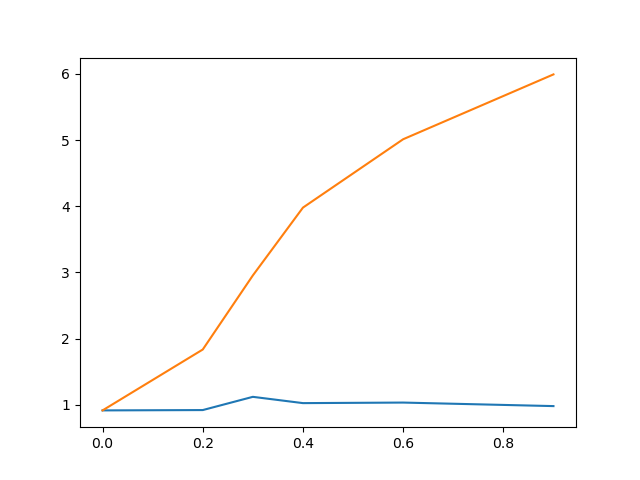

In [81]:
bins = [0, 0.2, 0.3, 0.4, 0.6, 0.9, 1]

h_counts, edges = np.histogram(yu, bins=bins, density=False)
h_density, edges = np.histogram(yu, bins=bins, density=True)

cumulative_counts = np.cumsum(h_counts)

# Integrate the PDF:
intervals = np.diff(bins)
int_density = np.cumsum(h_density * intervals)

print("Cumulative distribution:", cumulative_counts)
print("CDF:", int_density)

fig, ax = plt.subplots()
pl = ax.plot(edges[0:-1],h_density)
pl2 = ax.plot(edges[0:-1],np.cumsum(h_density))


Calculated this way, the last CDF value will always be 1.  The first value, corresponding to the left edge of the first bin, is 0, but it is not included in the output from the `histogram` function.  Below, we will prepend it to that output for plotting purposes, so we will have a value for each bin edge.

<IPython.core.display.Javascript object>


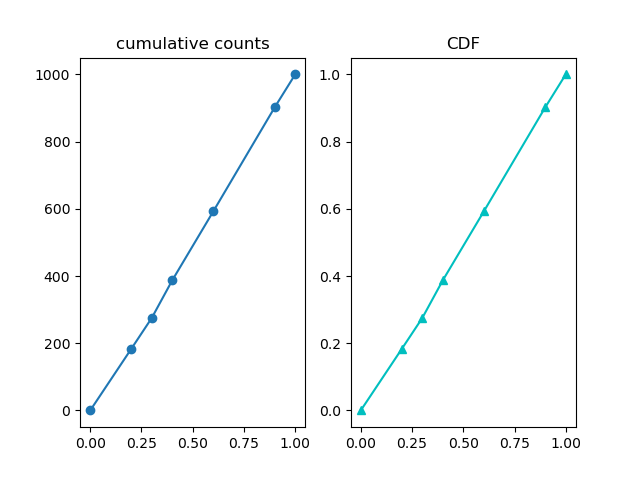

Text(0.5, 1.0, 'CDF')

In [86]:
fig, (axc, axd) = plt.subplots(ncols=2)
cc = np.hstack(([0], cumulative_counts))
axc.plot(bins, cc, marker='o')
axc.set_title('cumulative counts')

cdf = np.hstack(([0], int_density))
axd.plot(bins, cdf, marker='^',color='c')
axd.set_title('CDF')

In [87]:
plt.close(fig)

Of course you could also use the matplotlib `bar` function, or skip the explicit `np.histogram` calculation and let matplotlib do it for you via its `hist`, but for the cumulative distribution I think a line plot makes more sense.  Do you agree or disagree?  Why?

## Making your own (slow) histogram function

The `np.histogram` function is fast and convenient, but to be sure you understand what it is doing your assignment is to write a version of your own, using a simple strategy of looping through the bins.  Here are some things you will need.

In [105]:
# If you have an array of bin boundaries, you can loop through the pairs of boundaries like this:
bins = [1.1, 2.2, 3.3, 4.4, 5.5]
print('method 1')
for left, right in zip(bins[:-1], bins[1:]):
    print(left, right)
    
# Or like this:
print('\nmethod 2')
a=range(len(bins)-1)
for i in range(len(bins)-1):
    left, right = bins[i:i+2]
    print(left, right)
    
# Or like this:
print('\nmethod3')
for i in range(len(bins)-1):
    left = bins[i]
    right = bins[i+1]
    print(left, right)

method 1
1.1 2.2
2.2 3.3
3.3 4.4
4.4 5.5

method 2
1.1 2.2
2.2 3.3
3.3 4.4
4.4 5.5

method3
1.1 2.2
2.2 3.3
3.3 4.4
4.4 5.5


In [108]:
# Once you have a left and right, you will need to use them to select the appropriate values:
xx = 10 * np.random.randn(500)
left = 4.4
right = 5.0
selection = xx[(xx >= left) & (xx < right)]
print(selection)
print("We found %d values in the [%.2f, %.2f] bin"
      % (len(selection), left, right))  # or selection.size


[4.93549261 4.69908312 4.69550907 4.99569    4.93297501 4.78246711
 4.66181111 4.92838392 4.94250472 4.58117813 4.41474983]
We found 11 values in the [4.40, 5.00] bin


## Distribution-related functions

Numpy has basic random number generation functions; scipy provides access to much more information about various theoretical distributions.  Here is a very brief example for the Normal distribution.

<IPython.core.display.Javascript object>


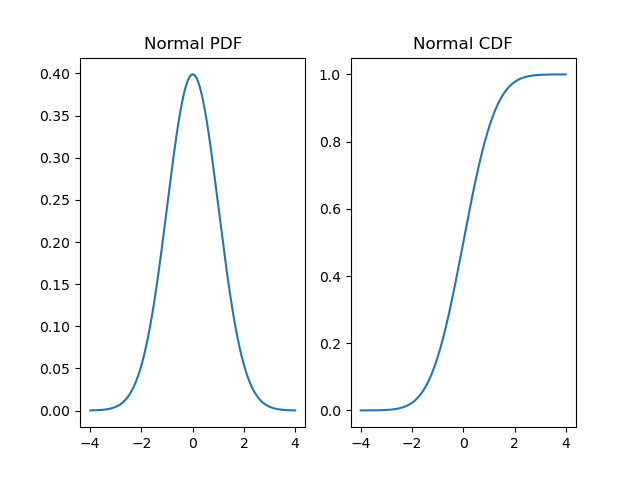

Text(0.5, 1.0, 'Normal CDF')

In [109]:
x = np.linspace(-4, 4, 500)

fig, (axd, axc) = plt.subplots(ncols=2)

axd.plot(x, ss.norm.pdf(x))
axd.set_title('Normal PDF')

axc.plot(x, ss.norm.cdf(x))
axc.set_title('Normal CDF')

In [132]:
plt.close(fig)
ss.norm?


Use `ss.norm?` to see the various functions (actually, methods) that are available.  Some of these will be very useful later in the course.

### Fitting a Gaussian distribution

Suppose you have a data set that appears to be approximately Gaussian.  How might you fit a Gaussian curve to it?  Let's try a simple approach.  We will start with a series that really is Gaussian.  We know the true mean and true standard deviation for our experiment, but of course with a real data set we would know only the sample mean and sample standard deviation.  We just use those as the parameters for our estimated Gaussian fit.

sample mean and standard deviation are 1.5970311903990047 2.4525103348305293


<IPython.core.display.Javascript object>


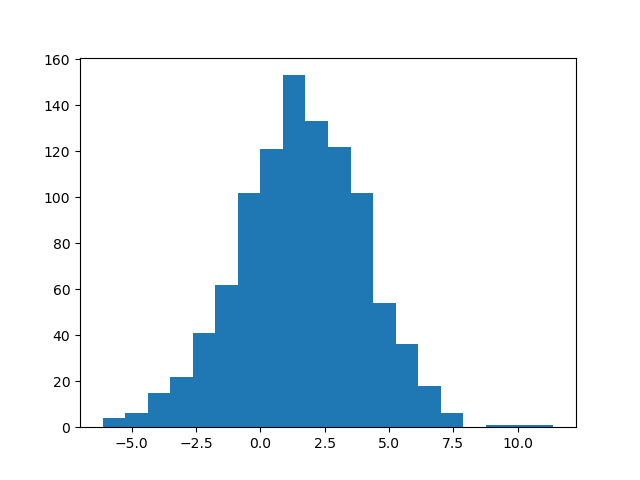

(array([  4.,   6.,  15.,  22.,  41.,  62., 102., 121., 153., 133., 122.,
        102.,  54.,  36.,  18.,   6.,   0.,   1.,   1.,   1.]),
 array([-6.13441095e+00, -5.25786507e+00, -4.38131918e+00, -3.50477329e+00,
        -2.62822741e+00, -1.75168152e+00, -8.75135638e-01,  1.41024784e-03,
         8.77956133e-01,  1.75450202e+00,  2.63104790e+00,  3.50759379e+00,
         4.38413968e+00,  5.26068556e+00,  6.13723145e+00,  7.01377733e+00,
         7.89032322e+00,  8.76686910e+00,  9.64341499e+00,  1.05199609e+01,
         1.13965068e+01]),
 <BarContainer object of 20 artists>)

In [117]:
np.random.seed(1)
ymean_true = 1.5
ystd_true = 2.5
y = ymean_true + ystd_true * np.random.randn(1000)
ymean = y.mean()
ystd = y.std()
print('sample mean and standard deviation are', ymean, ystd)

fig, ax = plt.subplots()
ax.hist(y,20)

<IPython.core.display.Javascript object>


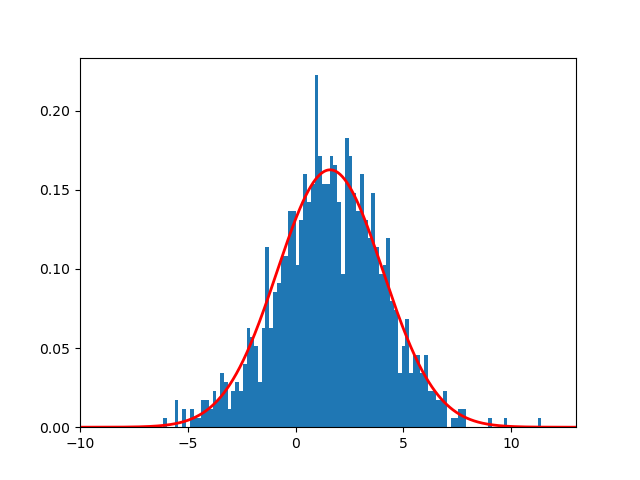

(-10.0, 13.0)

In [139]:
x = np.linspace(-10, 13, 1000)
y_pdf = ss.norm(loc=ymean, scale=ystd).pdf(x)

fig, ax = plt.subplots()
ax.hist(y, 100, density=True)
ax.plot(x, y_pdf, 'r', lw=2)
ax.set_xlim(-10, 13)

In [ ]:
plt.close(fig)

We see that even with 1000 independent points taken from a very good Gaussian distribution, the randomness means we don't get a perfect fit.  How would the fit change if we used more bins in the histogram?  Try it and see!  Make sure you understand, and can explain, how the fit of the histogram to the continuous pdf varies with the number of bins.

### Rayleigh distribution

Suppose we are in a location where the vector-mean wind is zero, but the East and North components of the wind are approximately Gaussian, are uncorrelated, and have the same standard deviation--let's say it is 5 m/s.  The wind direction would be uniformly distributed around all points of the compass.  What would the distribution of the *speed* look like?  It certainly can't be Gaussian--it has to be positive. It should be a Rayleigh distribution.  Let's check.

In [141]:
np.random.seed(1)
npts = 10000
u = 5 * np.random.randn(npts)
v = 5 * np.random.randn(npts)
s = np.hypot(u, v)

<IPython.core.display.Javascript object>


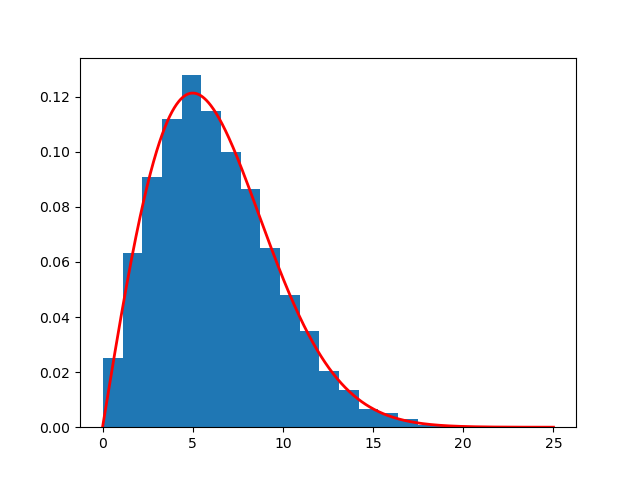

In [144]:
x = np.linspace(0, 25, 1000)
y = ss.rayleigh(scale=5).pdf(x)

nbins=20
fig, ax = plt.subplots()
ax.hist(s, nbins, density=True);
ax.plot(x, y, 'r', lw=2)

In [ ]:
plt.close(fig)

Notice that although the Gaussian distribution has two free parameters, the Rayleigh distribution has only one: the scale.  How can we estimate it?  It is not the mean or the median:

In [145]:
print("mean and median of the speed are", s.mean(), np.median(s))

mean and median of the speed are 6.264532425470077 5.860601198978201


The scale parameter--which gives the location of the *mode*, or highest point on the pdf-- is $\sqrt{\frac{2}{\pi}}$ times the mean.

In [146]:
print("estimated mode is", np.sqrt(2/np.pi) * s.mean())


estimated mode is 4.998373702931501
